In [1]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/ColabFiles/houseDataset2024.csv"  /content/houseDataset2024.csv
!cp -R "/content/drive/MyDrive/ColabFiles/client" /content/client

Mounted at /content/drive


In [3]:
#2
df=pd.read_csv("houseDataset2024.csv")

In [4]:
#3
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47953 entries, 0 to 47952
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             47953 non-null  object 
 1   title           47953 non-null  object 
 2   type            47953 non-null  object 
 3   price           47953 non-null  float64
 4   area            47953 non-null  object 
 5   city            47953 non-null  object 
 6   address         47953 non-null  object 
 7   bedrooms        47953 non-null  object 
 8   baths           47953 non-null  object 
 9   area_sqft       47953 non-null  float64
 10  price_per_sqft  47953 non-null  float64
 11  area_sqm        47953 non-null  float64
 12  price_per_sqm   47953 non-null  float64
 13  Latitude        47953 non-null  float64
 14  Longitude       47953 non-null  float64
 15  date_added      47953 non-null  object 
dtypes: float64(7), object(9)
memory usage: 5.9+ MB


In [5]:
#4
df=df[df["type"]=="House"]
df.drop(columns=["url","title","area","type","area_sqm","price_per_sqm","date_added","Latitude","Longitude"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47953 entries, 0 to 47952
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           47953 non-null  float64
 1   city            47953 non-null  object 
 2   address         47953 non-null  object 
 3   bedrooms        47953 non-null  object 
 4   baths           47953 non-null  object 
 5   area_sqft       47953 non-null  float64
 6   price_per_sqft  47953 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.6+ MB


In [6]:
#5
df.groupby("city")["city"].agg('count')

,city
city,
Abbottabad,168
Bahawalpur,194
Faisalabad,1188
Gujranwala,1175
Gujrat,112
Gwadar,5
Hyderabad,163
Islamabad,8499
Jhelum,111


In [7]:
#6
df['bedrooms'] = df['bedrooms'].str.extract('(\d+)').astype(int)
df['baths'] = df['baths'].str.extract('(\d+)').astype(int)

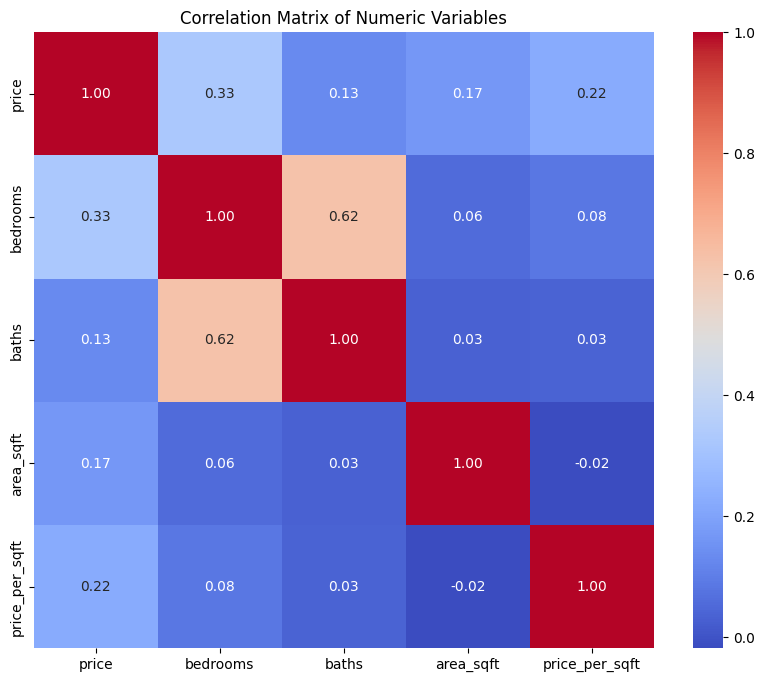

In [8]:
# Calculate the correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [9]:
df.isnull().sum()

,0
price,0
city,0
address,0
bedrooms,0
baths,0
area_sqft,0
price_per_sqft,0


In [10]:
#7
df["city"]=pd.factorize(df["city"])[0]

In [11]:
df.tail()

,price,city,address,bedrooms,baths,area_sqft,price_per_sqft
47948,32000000.0,18,"Khayaban-e-Sadiq, Sargodha, Punjab",4,4,2722.50,1.175390e+04
47949,16000000.0,18,"Others, Sargodha, Punjab",5,5,1361.25,1.175390e+04
47950,14000000.0,18,"Sharif Garden, Sargodha, Punjab",4,4,0.00,inf
47951,28500000.0,18,"Khayaban-e-Shair, Sargodha, Punjab",4,5,1633.50,1.744720e+04
47952,19500000.0,18,"Khayaban-e-Naveed, Sargodha, Punjab",5,6,1361.25,1.432507e+04


In [12]:
df["bedrooms"].unique()

array([ 4, 10,  6,  5,  3,  0,  7,  2,  9,  8, 11,  1])

In [13]:
df[df.bedrooms>=6]

,price,city,address,bedrooms,baths,area_sqft,price_per_sqft
1,750000000.0,0,"F-7, Islamabad, Islamabad Capital",10,0,20691.00,36247.643903
2,450000000.0,0,"F-7, Islamabad, Islamabad Capital",6,6,10890.00,41322.314050
3,290000000.0,0,"F-7, Islamabad, Islamabad Capital",6,6,7078.50,40969.131878
11,65000000.0,0,"G-14, Islamabad, Islamabad Capital",7,6,2450.25,26527.905316
17,130000000.0,0,"DHA Defence, Islamabad, Islamabad Capital",6,6,5445.00,23875.114784
...,...,...,...,...,...,...,...
47927,47500000.0,18,"Faisalabad Road, Sargodha, Punjab",6,6,2722.50,17447.199265
47932,37500000.0,18,"Nazeer Garden, Sargodha, Punjab",6,6,2178.00,17217.630854
47933,80000000.0,18,"Sher Zaman Town, Sargodha, Punjab",6,6,5445.00,14692.378329
47937,26000000.0,18,"Satellite Town, Sargodha, Punjab",6,6,1361.25,19100.091827


In [14]:
df["area_sqft"].unique()

array([1.361250e+03, 2.069100e+04, 1.089000e+04, 7.078500e+03,
       5.445000e+03, 1.824075e+03, 1.633500e+03, 8.167500e+03,
       2.178000e+04, 2.450250e+03, 2.178000e+03, 1.905750e+03,
       2.722500e+03, 3.811500e+03, 1.960200e+04, 2.613600e+04,
       1.143450e+04, 9.801000e+03, 8.712000e+03, 6.534000e+03,
       3.865950e+03, 1.089000e+03, 4.356000e+03, 4.083750e+03,
       1.497375e+03, 2.967525e+03, 1.306800e+04, 3.267000e+03,
       5.989500e+03, 1.769625e+03, 1.524600e+03, 2.014650e+04,
       4.846050e+03, 1.388475e+03, 2.668050e+03, 1.742400e+04,
       3.539250e+03, 1.197900e+03, 2.368575e+03, 1.633500e+04,
       8.439750e+02, 2.749725e+03, 2.994750e+03, 5.308875e+03,
       9.256500e+03, 1.034550e+04, 7.623000e+03, 3.375900e+03,
       1.225125e+03, 1.361250e+04, 1.334025e+03, 2.913075e+03,
       2.722500e+04, 4.628250e+03, 9.528750e+02, 1.470150e+03,
       1.579050e+03, 8.167500e+02, 3.021975e+03, 2.858625e+03,
       1.905750e+04, 1.524600e+04, 3.403125e+03, 2.8314

In [15]:
address_stats=df.groupby("address")["address"].agg('count').sort_values(ascending=False)
len(df.address.unique())
df.shape

(47953, 7)

In [16]:
len(address_stats[address_stats<=10])

865

In [17]:
address_less_than_10 = address_stats[address_stats<=10]
address_less_than_10

,address
address,
"Rizwan Garden Scheme, Lahore, Punjab",10
"Jalil Town, Gujranwala, Punjab",10
"AWT Housing Scheme Badabair, Peshawar, Khyber Pakhtunkhwa",10
"Baldia Town, Karachi, Sindh",10
"Allama Iqbal Town, Gujranwala, Punjab",10
...,...
"Temple Road, Lahore, Punjab",1
"Valley View Residency, Murree, Punjab",1
"Usman-e-Ghani Road, Multan, Punjab",1


In [18]:
# handle outliers
df.address=df.address.apply(lambda x: "other" if x in address_less_than_10 else x)
len(df.address.unique())


297

In [19]:
# df=df.drop(df.index[47950])
# df.tail()
# df.shape

In [20]:
df1=df[~(df.area_sqft/df.bedrooms<300)]
df1=df1[~df['price_per_sqft'].isin([float('inf'), float('-inf')])]
df1.shape

/tmp/ipython-input-20-3195476165.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df1[~df['price_per_sqft'].isin([float('inf'), float('-inf')])]


(36120, 7)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36120 entries, 0 to 47951
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           36120 non-null  float64
 1   city            36120 non-null  int64  
 2   address         36120 non-null  object 
 3   bedrooms        36120 non-null  int64  
 4   baths           36120 non-null  int64  
 5   area_sqft       36120 non-null  float64
 6   price_per_sqft  36120 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 2.2+ MB


In [22]:
df1.head()

,price,city,address,bedrooms,baths,area_sqft,price_per_sqft
0,23500000.0,0,"Bahria Town, Islamabad, Islamabad Capital",4,4,1361.25,17263.544536
1,750000000.0,0,"F-7, Islamabad, Islamabad Capital",10,0,20691.00,36247.643903
2,450000000.0,0,"F-7, Islamabad, Islamabad Capital",6,6,10890.00,41322.314050
3,290000000.0,0,"F-7, Islamabad, Islamabad Capital",6,6,7078.50,40969.131878
4,225000000.0,0,"F-8, Islamabad, Islamabad Capital",5,5,5445.00,41322.314050


In [23]:
df.price.describe()

,price
count,4.795300e+04
mean,6.724570e+07
std,1.101739e+08
min,1.060000e+06
25%,2.000000e+07
50%,3.600000e+07
75%,7.500000e+07
max,3.000000e+09


In [24]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby("address"):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df2=remove_pps_outliers(df1)
df2.shape

(27218, 7)

In [25]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [26]:
df2=df2[df2.bedrooms!=0]
df2=df2[df2.baths!=0]
df2.shape

(25332, 7)

In [27]:
df2.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [28]:
df2.shape

(25332, 7)

In [29]:
df2.columns = df2.columns.str.lower()
df2['address'] = df2['address'].str.lower()
dummies=pd.get_dummies(df2.address)
dummies.head()


,"abdalians cooperative housing society, lahore, punjab","adiala road, rawalpindi, punjab","afshan colony, rawalpindi, punjab","airport enclave, islamabad, islamabad capital","airport housing society, rawalpindi, punjab","airport road, lahore, punjab","al jalil garden, lahore, punjab","al noor garden, faisalabad, punjab","al razzaq royals, sahiwal, punjab","al rehman garden, lahore, punjab",...,"walton road, lahore, punjab","wapda city, faisalabad, punjab","wapda town, gujranwala, punjab","wapda town, lahore, punjab","wapda town, multan, punjab","warsak road, peshawar, khyber pakhtunkhwa","wazir town, rawalpindi, punjab","westridge, rawalpindi, punjab","zakariya town, multan, punjab","zaraj housing scheme, islamabad, islamabad capital"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25332 entries, 0 to 27217
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           25332 non-null  float64
 1   city            25332 non-null  int64  
 2   address         25332 non-null  object 
 3   bedrooms        25332 non-null  int64  
 4   baths           25332 non-null  int64  
 5   area_sqft       25332 non-null  float64
 6   price_per_sqft  25332 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.5+ MB


In [31]:
df3=pd.concat([df2,dummies],axis='columns')

df3.head()

,price,city,address,bedrooms,baths,area_sqft,price_per_sqft,"abdalians cooperative housing society, lahore, punjab","adiala road, rawalpindi, punjab","afshan colony, rawalpindi, punjab",...,"walton road, lahore, punjab","wapda city, faisalabad, punjab","wapda town, gujranwala, punjab","wapda town, lahore, punjab","wapda town, multan, punjab","warsak road, peshawar, khyber pakhtunkhwa","wazir town, rawalpindi, punjab","westridge, rawalpindi, punjab","zakariya town, multan, punjab","zaraj housing scheme, islamabad, islamabad capital"
0,49000000.0,2,"abdalians cooperative housing society, lahore,...",5,6,2722.50,17998.163453,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,88500000.0,2,"abdalians cooperative housing society, lahore,...",6,6,5445.00,16253.443526,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,51000000.0,2,"abdalians cooperative housing society, lahore,...",4,5,2994.75,17029.802154,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95000000.0,2,"abdalians cooperative housing society, lahore,...",5,6,5445.00,17447.199265,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,90000000.0,2,"abdalians cooperative housing society, lahore,...",5,6,5445.00,16528.925620,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df3.drop(columns=['address','price_per_sqft','city'],inplace=True)
df3.head()

,price,bedrooms,baths,area_sqft,"abdalians cooperative housing society, lahore, punjab","adiala road, rawalpindi, punjab","afshan colony, rawalpindi, punjab","airport enclave, islamabad, islamabad capital","airport housing society, rawalpindi, punjab","airport road, lahore, punjab",...,"walton road, lahore, punjab","wapda city, faisalabad, punjab","wapda town, gujranwala, punjab","wapda town, lahore, punjab","wapda town, multan, punjab","warsak road, peshawar, khyber pakhtunkhwa","wazir town, rawalpindi, punjab","westridge, rawalpindi, punjab","zakariya town, multan, punjab","zaraj housing scheme, islamabad, islamabad capital"
0,49000000.0,5,6,2722.50,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,88500000.0,6,6,5445.00,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,51000000.0,4,5,2994.75,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95000000.0,5,6,5445.00,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,90000000.0,5,6,5445.00,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df3.to_csv('data1.csv')
!cp data.csv "drive/My Drive/"

In [34]:
# threshold = df3['price'].quantile(0.90)
# df3 = df3[df3['price'] <= threshold]
# df3.shape

In [35]:
x=df3.drop('price',axis='columns')
x.head()

,bedrooms,baths,area_sqft,"abdalians cooperative housing society, lahore, punjab","adiala road, rawalpindi, punjab","afshan colony, rawalpindi, punjab","airport enclave, islamabad, islamabad capital","airport housing society, rawalpindi, punjab","airport road, lahore, punjab","al jalil garden, lahore, punjab",...,"walton road, lahore, punjab","wapda city, faisalabad, punjab","wapda town, gujranwala, punjab","wapda town, lahore, punjab","wapda town, multan, punjab","warsak road, peshawar, khyber pakhtunkhwa","wazir town, rawalpindi, punjab","westridge, rawalpindi, punjab","zakariya town, multan, punjab","zaraj housing scheme, islamabad, islamabad capital"
0,5,6,2722.50,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6,6,5445.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,5,2994.75,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5,6,5445.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,6,5445.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
y=df3.price
y.head()

,price
0,49000000.0
1,88500000.0
2,51000000.0
3,95000000.0
4,90000000.0


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.6175563487954054

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.9263468888221064


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# # Train model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(x_train, y_train)

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Train R²: 0.9827
Test R²: 0.9263


In [ ]:
x.columns

In [44]:
def predict_price(location,bedroom,bath,sqft):
  loc_index=np.where(x.columns==location)[0][0]
  X=np.zeros(len(x.columns))
  X[0]=bedroom
  X[1]=bath
  X[2]=sqft
  if loc_index>=0:
    X[loc_index]=1
  return model.predict([X])[0]

In [45]:
predict_price("wazir town, rawalpindi, punjab",5,3,1500 )

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(20699740.25974026)

In [46]:
import pickle
with open("real_estate_model.pickle","wb")as f:
  pickle.dump(model,f)

In [ ]:
# from google.colab import files
# files.download('real_estate_model.pickle')


In [47]:
import json
columns={
    'data_columns': [col.lower() for col in x.columns]
}
with open ("columns.json","w")as f:
  f.write(json.dumps(columns))

In [48]:
!curl -sSL https://ngrok-agent.s3.amazonaws.com/ngrok.asc \
  | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null \
  && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" \
  | sudo tee /etc/apt/sources.list.d/ngrok.list \
  && sudo apt update \
  && sudo apt install ngrok
!pip install pyngrok
!ngrok authtoken "2lCxGRma31qgLuD18mSmBYdkPxm_5D4H1PK1fex6AnoGYc7kA"

deb https://ngrok-agent.s3.amazonaws.com buster main
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,532 kB]
Get:8 https://ngrok-agent.s3.amazonaws.com buster InRelease [20.3 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,024 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,253 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:13 h

In [49]:
import pickle
import json
import numpy as np
from pyngrok import ngrok



__locations = None
__data_columns = None
__model = None

def load_saved_artifacts():
    print("loading saved artifacts...start")
    global  __data_columns
    global __locations

    with open("columns.json", "r") as f:
        __data_columns = json.load(f)['data_columns']
        __locations = __data_columns[3:]

    global __model
    if __model is None:
        with open('real_estate_model.pickle', 'rb') as f:

            __model = pickle.load(f)
    print("loading saved artifacts...done")

def get_location_names():
    print("Locations loaded:", __locations)
    return __locations

def get_data_columns():
    return __data_columns


if __name__ == '__main__':
    load_saved_artifacts()
    # print(get_location_names())
    # print(get_estimated_price("bahria town, lahore, punjab",2500,4,4))


loading saved artifacts...start
loading saved artifacts...done


In [50]:
!pip install flask_ngrok
from flask import Flask, request, jsonify
from flask import send_from_directory
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
public_url = ngrok.connect(5000).public_url
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000\"")

# run_with_ngrok(app)
@app.route('/',methods=['GET'])
def open_home_page():
  return send_from_directory("/content/client/", "app.html")

@app.route('/<path:filename>')
def serve_static_file(filename):
    return send_from_directory("/content/client/", filename)


@app.route('/get_location_names',methods=['GET'])
def get_location_names_route():
    response = jsonify({
        'locations': get_location_names()
    })
    response.headers.add('Access-Control-Allow-Origin', '*')

    return response

@app.route('/predict_home_price', methods=['GET','POST'])
def predict_home_price():
    total_sqft = float(request.form['total_sqft'])
    location = request.form['location']
    bedroom = int(request.form['bedroom'])
    bath = int(request.form['bath'])


    response = jsonify({
        'estimated_price': predict_price(location,bedroom,bath,total_sqft)
    })

    response.headers.add('Access-Control-Allow-Origin', '*')

    return response

if __name__ == "__main__":
    print("Starting Python Flask Server For Home Price Prediction...")
    load_saved_artifacts()
    app.run()

 * ngrok tunnel "https://8834-34-48-190-52.ngrok-free.app" -> "http://127.0.0.1:5000"
Starting Python Flask Server For Home Price Prediction...
loading saved artifacts...start
loading saved artifacts...done
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 18:13:50] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 18:13:51] "GET /app.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 18:13:51] "GET /app.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 18:13:51] "GET /get_location_names HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 18:13:51] "GET /favicon.ico HTTP/1.1" 404 -


Locations loaded: ['abdalians cooperative housing society, lahore, punjab', 'adiala road, rawalpindi, punjab', 'afshan colony, rawalpindi, punjab', 'airport enclave, islamabad, islamabad capital', 'airport housing society, rawalpindi, punjab', 'airport road, lahore, punjab', 'al jalil garden, lahore, punjab', 'al noor garden, faisalabad, punjab', 'al razzaq royals, sahiwal, punjab', 'al rehman garden, lahore, punjab', 'alfalah town, lahore, punjab', 'allama iqbal town, lahore, punjab', 'architects engineers housing society, lahore, punjab', 'askari 10, rawalpindi, punjab', 'askari 13, rawalpindi, punjab', 'askari 14, rawalpindi, punjab', 'askari 6, peshawar, khyber pakhtunkhwa', 'askari bypass, multan, punjab', 'askari, lahore, punjab', 'audit & accounts housing society, lahore, punjab', 'b-17, islamabad, islamabad capital', 'bahadurpur, multan, punjab', 'bahria nasheman, lahore, punjab', 'bahria orchard, lahore, punjab', 'bahria town rawalpindi, rawalpindi, punjab', 'bahria town, isla